# CSC421 Assignment 3 - Part I  Simulation and Probabilities (5 points) #
### Author: George Tzanetakis 

This notebook is based on the supporting material for topics covered in **Chapter 13 Quantifying Uncertainty** from the book *Artificial Intelligence: A Modern Approach.* This part does NOT rely on the provided code so you can complete it just using basic Python. 

```
Misunderstanding of probability may be the greatest of all impediments
to scientific literacy.

Gould, Stephen Jay
```

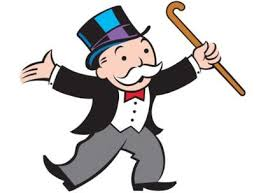


# Introduction - Simulation for approximate estimation of probabilities 

In this assignment your task is to incrementally create a simulation for the board game Monopoly
https://en.wikipedia.org/wiki/Monopoly_(game). Very interesting origin story for the game: 
https://www.saturdayeveningpost.com/2017/09/really-invented-monopoly/


**NOTE THAT THE GRADING IN THIS ASSIGNMENT IS DIFFERENT FOR GRADUATE STUDENTS AND THEY HAVE TO DO EXTRA WORK FOR FULL MARKS**

Consider simulating a game of Monopoly. Your goal is to experimentally determine the cummulative probability of landing on each square following the rules of the game after 100 moves. By cummulative I mean the total
number of times you land on a square during a play. So for example if you land on the Free Parking square 5 times during the 100 moves in a particular run of the simulation then the probability of landing on that square is 5/100.

To get accurate probabilities you will have to run 1000 simulated games. You can assume that you are only a considering a single player and you ignore buying/selling property. You will need to simulate chance cards, rolling the dice including doubles, and going to jail. The following article has some
information you can use in your simulation http://www.businessinsider.com/math-monopoly-statistics-2013-6.

You can use the random variables and probability notebook code we covered in class or directly implement the random sampling to simulate playing the Monopoly game 1000 times and show on a table what is the probability of landing in each railway station, the GO square, Mediterenean Avenue and Boardwalk. The questions below break this problem into incremental steps. 


# Question 1A (Minimum) CSC421 -  (1 point, CSC581C - 0 points) 

Write code to generate random numbers corresponding to rolling a pair of dice and summing the output taking into account the doubling rule (when you roll doubles you get to roll again). Include all the code with comments describing what you are doing. 

In [ ]:
from scipy import stats
import numpy as np 
import random

In [ ]:
'''
Taken from mining_random_variables notebook. CSC421, March 2020
'''
class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
    
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 

In [ ]:
class Die():
    def __init__(self):
        self._value = 0
        
    def roll(self):
        r = random.randrange(1,7)
        self._value = r
        return r
    
    def value(self):
        return self._value

# YOUR CODE GOES HERE 
def conduct_roll():
    sum = 0
    roll_count = 0
    die1 = Die()
    die2 = Die()
    
    while die1.value() == die2.value():
        
        sum += die1.roll() + die2.roll()
        
        roll_count += 1
        
        # if player rolls more than 2 pairs, go to jail
        if roll_count > 2:
            return -1
    return sum

print(conduct_roll())

# Question 1B (Minimum) (CSC421 - 1 point, CSC581C - 0 point) 

Write code for selecting a chance card at random based on the information provided in the article about the math of Monopoly. The chance cards that are not about movement will be ignored in this assignment but you should still 
simulate them. 

In [ ]:
# YOUR CODE GOES HERE 
chance_cards = ["advance:0",
         "advance:illinois",
         "advance:st.charles", 
         "advance:utitlity", 
         "advance:railroad",
         "bank_pays_you_50",
         "get_out_of_jail_free",
         "back:3",
         "advance:jail",
         "repair_fee",
         "poor_tax_fee",
         "advance:reading_railroad",
         "advance:boardwalk",
         "fee:50",
         "collect:150",
         "collect:100"]

class Deck():
    
    def __init__(self, cards):
        random.shuffle(cards)
        self._cards = cards
        self._discards = []
        
    def  draw(self):
        # TODO 
        # Check if deck is empty, 
        # re-shuffle the discard pile
        card = self._cards[0]
        self._cards.pop(0)
        self._discards.append(card)
        return card
    
deck = Deck(chance_cards)

print(deck.draw())


# Question 1C (Expected) 1 point 

Write code to simulate movement around the board for one player with rolling pair of dice as well as the doubling rule. For this question you don't need to simulate go to jail and chance cards (you will do that in the next question) 


In [ ]:
encoding = {
    0: "GO",
    5: "RAILROAD1",
    7: "CHANCE",
    10: "JAIL",
    15: "RAILROAD2",
    20: "PARKING",
    22: "CHANCE",
    25: "RAILRAOD3",
    30: "GOTOJAIL",
    35: "RAILROAD4",
    36: "CHANCE"
    
}
class Board():
    
    def __init__(self):
        self._players = []
        self._chance_deck = Deck(chance_cards)
        
    def add_player(self, player):
        self._players.append(player)
        
    def get_player_positions(self): 
        positions = []
        for player in self._players:
            positions.append({
                "name": player.name,
                "position": player.get_position()
            })
            
        return positions
    
# YOUR CODE GOES HERE 
class Player():
    
    def __init__(self, name="default_name"):
        self._position = 0
        self.name = name
        self._in_jail = False
        
    def conduct_turn(self):
        # Make roll
        roll_value = conduct_roll()
        if roll_value == -1:
            # Go to jail
            self._in_jail = True
            return
            
        # move to position
        self._position = (self._position + roll_value) % 40
        
        # 
        
    def get_position(self):
        return self._position

board = Board()
alice = Player("alice")
board.add_player(alice)

for _ in range(20):
    alice.conduct_turn()
    print(board.get_player_positions())

# QUESTION 1D (EXPECTED) 1 point

Add the code for go to jail and chance cards. Record how many times you land on
each square after playing a game consisting of 100 moves. Run the simulation 1000 times 
and average the landing results. Show in a table the following probabilities: each railway station, the GO square, Mediterenean Avenue and Boardwalk.



# QUESTION 1E (ADVANCED) 1 point 

Write code that visualizes the board and associated probabilities in color using some kind of colormap. You can use any Python library for handling this. Some possibilities with different tradeoffs include ipythonblocks, bokeh, and PyGame. 

In [ ]:
# YOUR CODE GOES HERE 


# QUESTION 1F (ADVANCED) (CSC421 - 0 points, CSC581C - 2 points)

Implement code for handling the money aspect of monopoly and extend your simulation to handle multi-player playing by creating a very simple buying/selling AI for example randomly selecting one or the other action. 
You shoud be able to step through a fully simulated Game of Monopoly and see how everything is working. You can ignore building and assume that when a player lands in a property square they can purchase it at a predefined price and after they purchase it anyone who lands on that square pays a fixed fee. Also no need to simulate getting properties of the same color. 

Of course if you feel ambitious and want to do a full simulation of the actual game that's perfectly fine and 
you will not be penalized for the extra features. 



In [ ]:
# YOUR CODE GOES HERE 